# Data Cleaning

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler, InstanceHardnessThreshold, CondensedNearestNeighbour
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import classification_report, confusion_matrix


## Description

Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.


2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.


3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.


4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.


5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.


6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.


7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.


8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.


9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.


10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

### About this file

ppm: parts per million
μg/L: microgram per litre
mg/L: milligram per litre

Column description:

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

## Data exploration

In [3]:
df = pd.read_csv('../raw_data/water_potability.csv')

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df[df['ph'].isna()].head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
13,NaN,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
20,NaN,227.435048,22305.567414,10.333918,NaN,554.820086,16.331693,45.382815,4.133423,0
22,NaN,215.977859,17107.224226,5.607060,326.943978,436.256194,14.189062,59.855476,5.459251,0


In [8]:
df['ph'].max()

13.999999999999998

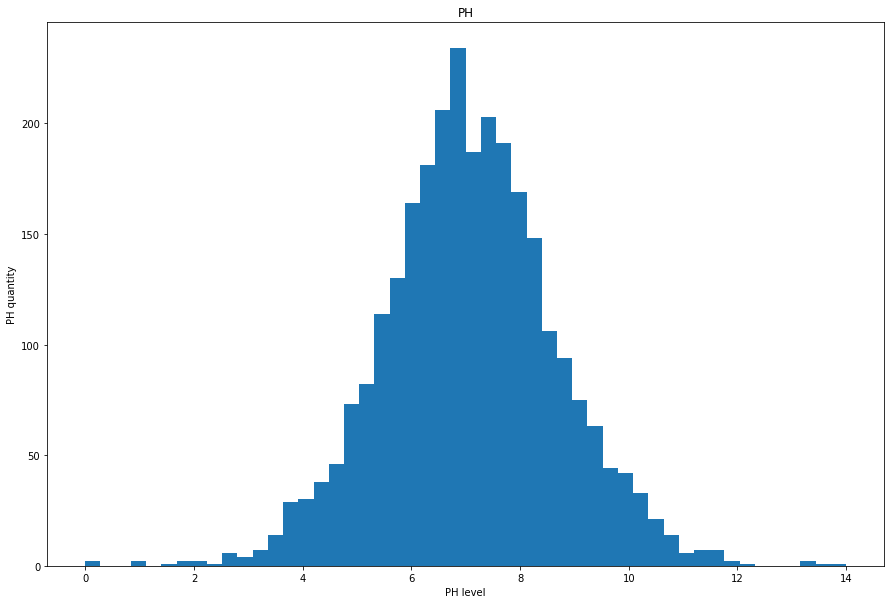

In [9]:
plt.figure(figsize=(15,10))
plt.hist(df['ph'], bins=50, )
plt.xlabel('PH level')
plt.ylabel('PH quantity')
plt.title('PH');

In [10]:
df[df['Sulfate'].isna()].head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
14,7.496232,205.344982,28388.004887,5.072558,NaN,444.645352,13.228311,70.300213,4.777382,0
16,7.051786,211.049406,30980.600787,10.094796,NaN,315.141267,20.397022,56.651604,4.268429,0


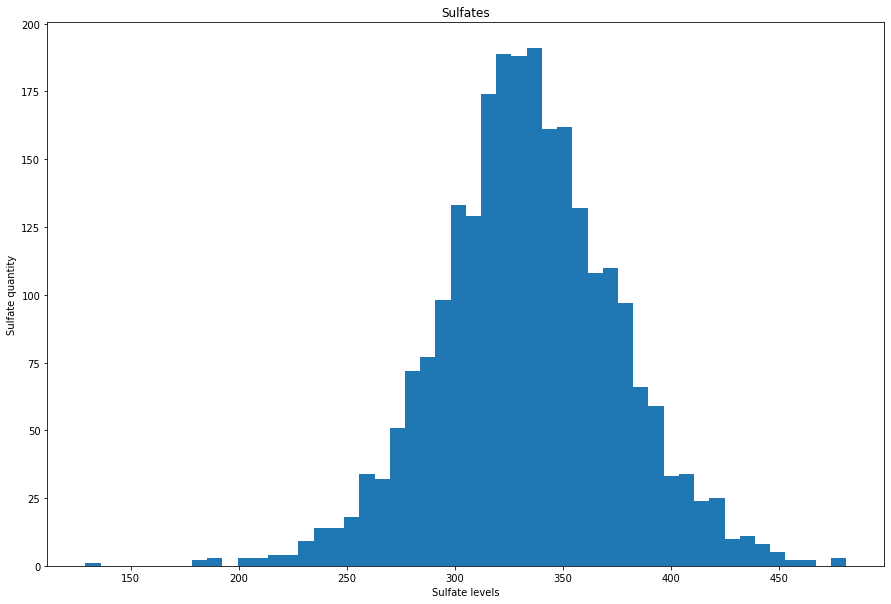

In [11]:
plt.figure(figsize=(15,10))
plt.hist(df['Sulfate'], bins=50)
plt.xlabel('Sulfate levels')
plt.ylabel('Sulfate quantity')
plt.title('Sulfates');

In [12]:
df[df['Trihalomethanes'].isna()].head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0


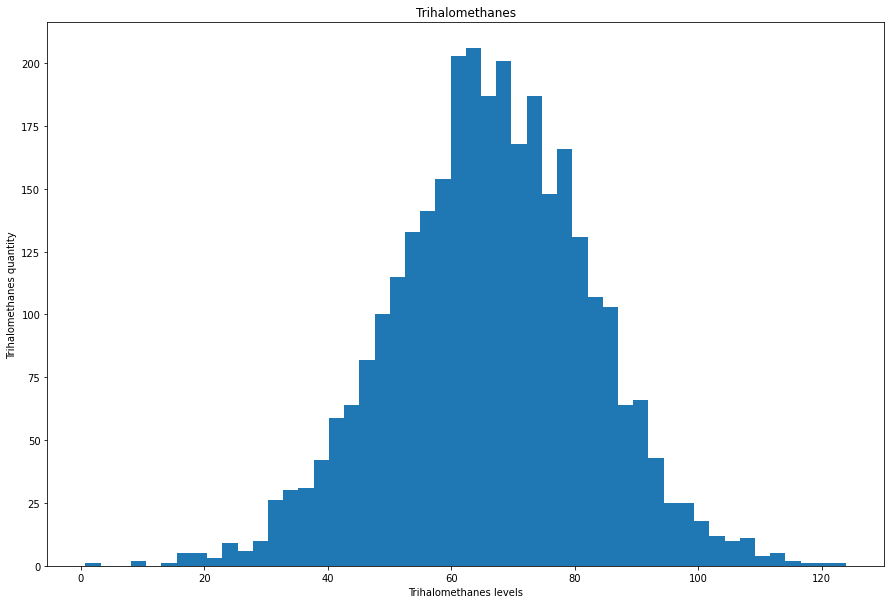

In [13]:
plt.figure(figsize=(15,10))
plt.hist(df['Trihalomethanes'], bins=50)
plt.xlabel('Trihalomethanes levels')
plt.ylabel('Trihalomethanes quantity')
plt.title('Trihalomethanes');

### Finding correlations

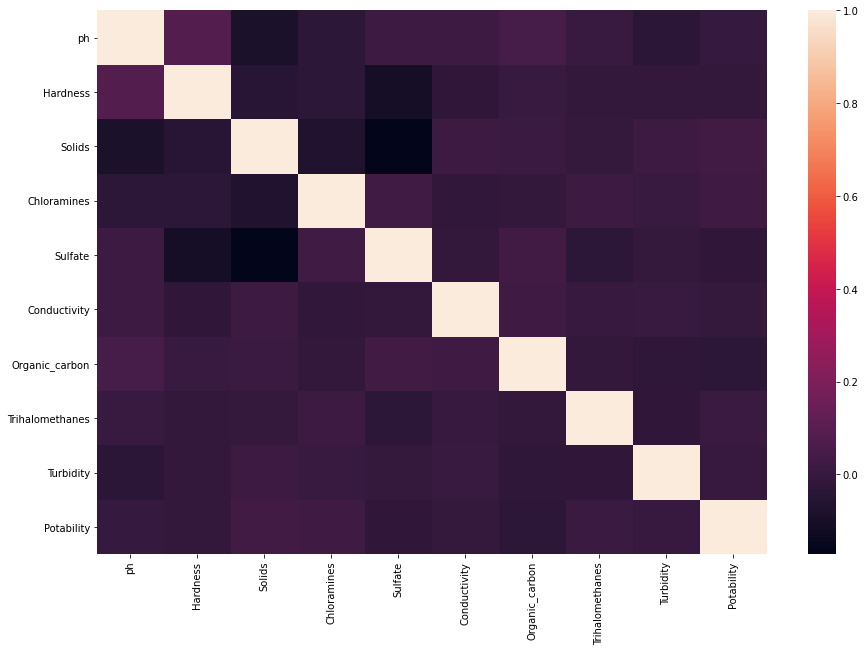

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), );

In [15]:
df.corr().style.background_gradient(cmap='coolwarm')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


As we can see there doesn't seem to be any correlations between the data. Let's look at the balance of the data set.

### Looking at the balance

In [16]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

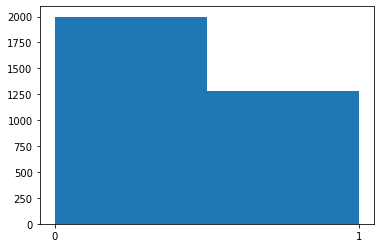

In [17]:
plt.hist(df['Potability'], bins=2, histtype='bar',align='mid' )
plt.xticks((0,1));

There seems to be a much larger proportion of data that is undrinkable. In later steps I will under-sample to make an even data set.

### Data cleaning

#### Transforming the data

In [18]:
def fill_na(data):
    d = pd.DataFrame()
    for column in data:
        d[column] = data[column].fillna(data.groupby(['Potability'])[column].transform('mean'))
    return d

In [19]:
df = fill_na(df)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,332.566990,392.449580,19.903225,66.539684,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,332.566990,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,332.566990,402.883113,11.168946,77.488213,4.708658,1


In [20]:
# df['ph'] = df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
# df['Sulfate'] = df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
# df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

#### Splitting and balancing the data set

In [21]:
X = df.drop(columns=['Potability'])
y = df['Potability']

In [22]:
print(X.shape)
print(y.shape)

(3276, 9)
(3276,)


#### Undersampling

##### Random Undersampling

In [23]:
X_undersampled, y_undersampled = RandomUnderSampler(random_state=42).fit_resample(X,y)

In [24]:
print(X_undersampled.shape)
print(y_undersampled.shape)

(2556, 9)
(2556,)


##### Condensed Nearest Neighbour

In [25]:
X_condensed, y_condensed = CondensedNearestNeighbour(random_state=42).fit_resample(X,y)

In [26]:
print(X_condensed.shape)
print(y_condensed.shape)

(2290, 9)
(2290,)


##### Instance Hardness Threshold THE BEST SO FAR

In [27]:
X_instance, y_instance = InstanceHardnessThreshold(random_state=42).fit_resample(X,y)

In [28]:
print(X_instance.shape)
print(y_instance.shape)

(2589, 9)
(2589,)


#### Oversampling

##### Random Oversampling

In [29]:
X_oversampled, y_oversampled = RandomOverSampler(random_state=42).fit_resample(X,y)

In [30]:
print(X_oversampled.shape)
print(y_oversampled.shape)

(3996, 9)
(3996,)


##### SMOTE

In [31]:
X_smote, y_smote = SMOTE().fit_resample(X,y)

In [32]:
print(X_smote.shape)
print(y_smote.shape)

(3996, 9)
(3996,)


##### ADASYN

In [33]:
X_adasyn, y_adasyn = ADASYN().fit_resample(X,y)

In [34]:
print(X_adasyn.shape)
print(y_adasyn.shape)

(4186, 9)
(4186,)


##### SMOTEENN

In [35]:
X_smoteen, y_smoteen = SMOTEENN().fit_resample(X,y)

In [36]:
print(X_smoteen.shape)
print(y_smoteen.shape)

(1113, 9)
(1113,)


In [37]:
##### SMOTETomek

In [38]:
X_smotetomek, y_smotetomek = SMOTETomek().fit_resample(X,y)

In [39]:
print(X_smotetomek.shape)
print(y_smotetomek.shape)

(3498, 9)
(3498,)


##### Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_instance, y_instance, test_size=0.3, random_state=42)

#### Scale the data

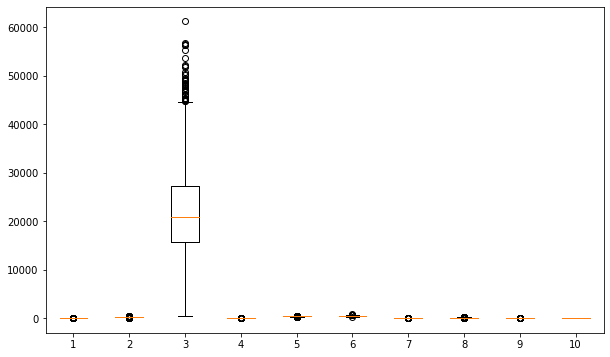

In [41]:
plt.figure(figsize=(10,6))
plt.boxplot(df);

In [42]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8
0,0.077770,-1.018906,-0.879789,0.139628,-0.304062,0.193497,-1.377536,1.510368,0.659381
1,-0.009601,1.066671,-0.815580,-1.050615,-0.009574,-0.522192,-0.649408,1.265425,1.402426
2,1.607554,0.599198,0.702194,-0.618891,0.578603,-0.969928,0.630768,-2.178055,-1.130363
3,-0.462259,0.537821,-1.441002,1.815757,-1.728392,1.024591,-0.416629,0.330608,1.266303
4,-0.363930,-1.224518,-1.047963,1.665093,0.192547,-0.086991,-1.196805,0.769339,-0.246674
...,...,...,...,...,...,...,...,...,...
1807,0.653755,-1.459679,3.061864,-1.506320,-1.876113,-0.411255,-0.557493,0.018692,-1.905241
1808,0.759617,0.986181,-0.998898,-0.712787,-0.023921,2.232536,0.177027,2.365485,-0.355510
1809,0.859666,1.194756,-0.343391,-1.810649,-0.009574,-0.512896,0.256675,-0.685154,-0.722600
1810,-0.091241,-0.561925,2.091411,1.139563,0.060771,-0.401606,-0.012526,0.582439,-0.428475


In [43]:
X_test_transformed = scaler.transform(X_test)
X_test_transformed

array([[ 3.57317984e-01, -1.87017475e-01, -1.46704455e+00, ...,
         8.97200043e-01, -5.82795869e-02,  3.32386612e+00],
       [-9.60140549e-03, -3.66990264e-01, -1.15504959e-01, ...,
         1.27581958e+00, -2.55499136e-04, -2.40398679e-01],
       [ 8.91127782e-01,  4.94076104e-02,  7.62808159e-01, ...,
         3.38884694e-01, -1.97944949e+00,  7.41039061e-01],
       ...,
       [-1.76804977e-02, -1.64854835e+00,  2.68490684e+00, ...,
         1.93887380e+00,  2.50206342e-01,  8.45964205e-01],
       [-2.44109551e-01, -9.18182641e-01,  7.09892212e-02, ...,
        -4.49325477e-01, -6.83333869e-01, -8.48180987e-01],
       [-1.96174303e-01,  6.76775512e-01,  6.56069055e-01, ...,
         1.59572872e+00,  1.48150834e-01, -1.19458562e+00]])

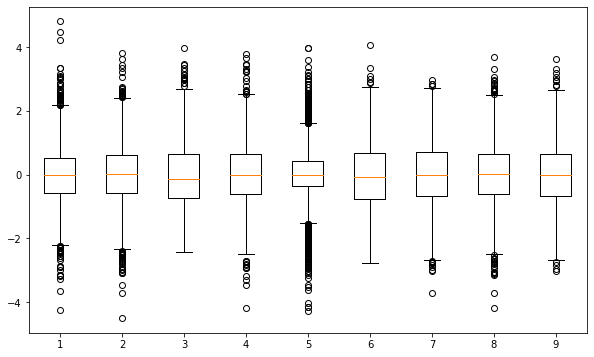

In [44]:
plt.figure(figsize=(10,6))
plt.boxplot(X_train_transformed);

#### Getting a baseline

In [45]:
log_model = LogisticRegression(random_state=42).fit(X_train_transformed, y_train)

In [46]:
y_pred = log_model.predict(X_test_transformed)

In [47]:
log_model.score(X_train_transformed, y_train)

0.5331125827814569

In [48]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [49]:
np.matrix(y_test)

matrix([[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
         1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
         1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
         0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
         1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
         0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
         1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
         1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
         0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
         0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
         1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
         0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0

#### Logistic regression grid scoring

In [50]:
log_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [51]:
param_grid = {'C': (0.01, 0.1, 1, 10, 100),
             'max_iter': (1, 10, 25, 50, 100, 200),
            'tol': (0.0001, 0.001, 0.01)
             }

In [52]:
gridsearch = GridSearchCV(log_model, 
                          param_grid=param_grid, 
                          cv=10,  
                          n_jobs=-1,
                          scoring='accuracy')

gridsearch.fit(X_train_transformed, y_train)
print(gridsearch.best_params_)
gridsearch.best_score_

/Users/keirferguson/.pyenv/versions/3.8.6/envs/cleanwater/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/keirferguson/.pyenv/versions/3.8.6/envs/cleanwater/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

{'C': 10, 'max_iter': 10, 'tol': 0.01}


org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/keirferguson/.pyenv/versions/3.8.6/envs/cleanwater/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/keirferguson/.pyenv/versions/3.8.6/envs/cleanwater/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REA

0.514388925991136

In [53]:
randomGrid = RandomizedSearchCV(log_model, 
                                param_distributions=param_grid,
                                cv=10, 
                                n_jobs=-1, 
                                verbose=2, 
                                scoring='accuracy')

randomGrid.fit(X_train_transformed, y_train)
print(randomGrid.best_params_)
randomGrid.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'tol': 0.01, 'max_iter': 100, 'C': 10}


/Users/keirferguson/.pyenv/versions/3.8.6/envs/cleanwater/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/keirferguson/.pyenv/versions/3.8.6/envs/cleanwater/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

0.514388925991136

### Trying a Gradient Boost Classifier

After reading about Gradient Boost Classifier I thought this could be good for the job, especially with a high number of estimators.  

In [54]:
grad_model = GradientBoostingClassifier(n_estimators=922, 
                                        learning_rate=0.030204081632653063, 
                                        subsample=0.779795918367347,
                                        max_depth= 10, 
                                        tol = 0.0001,
                                        validation_fraction=5.922448979591836,
                                       random_state=42).fit(X_train_transformed, y_train)

In [55]:
grad_model.score(X_train_transformed, y_train)

1.0

In [56]:
y_grad_pred = grad_model.predict(X_test_transformed)
y_grad_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [57]:
grad_model.loss_(y_test, y_grad_pred)

1.0900854180115143

In [58]:
np.matrix(y_test)

matrix([[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
         1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
         1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
         0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
         1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
         0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
         1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
         1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
         0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
         0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
         1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
         0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0

In [59]:
grad_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.030204081632653063,
 'loss': 'deviance',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 922,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 0.779795918367347,
 'tol': 0.0001,
 'validation_fraction': 5.922448979591836,
 'verbose': 0,
 'warm_start': False}

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       392
           1       0.93      0.90      0.91       385

    accuracy                           0.92       777
   macro avg       0.92      0.92      0.92       777
weighted avg       0.92      0.92      0.92       777



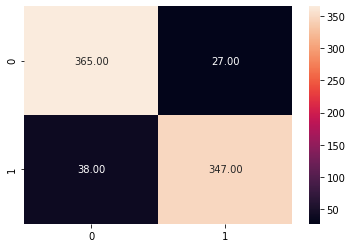

In [60]:
print(classification_report(y_test, y_grad_pred))
sns.heatmap(confusion_matrix(y_test, y_grad_pred), annot=True, fmt='.2f');

In [78]:
param_grid = {'learning_rate': (np.linspace(0.01,1)),
              'n_estimators': (np.linspace(800,1300, dtype='int')),
              'max_depth': (1, 5, 10),
             'validation_fraction': (np.linspace(0.01,10)),
            'tol': (0.0001, 10),
              'subsample': (np.linspace(0.17,1))
             }
scoring = {'AUC': 'roc_auc', 
           'Accuracy': 'accuracy', 
           'F1': 'f1',
           'max_error': 'max_error',
           'Precision': 'precision'
          }

randomGrid = RandomizedSearchCV(grad_model, 
                                param_distributions=param_grid,
                                cv=10, 
                                n_jobs=-1, 
                                scoring='accuracy',
                                return_train_score=True,
                               )

randomGrid.fit(X_train_transformed, y_train)
print(randomGrid.best_params_)
randomGrid.best_score_

{'validation_fraction': 6.1263265306122445, 'tol': 0.0001, 'subsample': 0.5595918367346938, 'n_estimators': 1055, 'max_depth': 5, 'learning_rate': 0.23224489795918368}


0.8780432274907414